<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/TEST_LSTM_Model_M5ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD LIBRARIES

In [ ]:
#Installing libraries
!pip install tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Correct import
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Correct import
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Best parametr based on tuning for XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Utilities
from datetime import datetime

# Machine Learning - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metrics for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Deep Learning with Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Wrapper for Keras models

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
from scipy.stats import uniform, randint

# Supress user warnings
import warnings
warnings.filterwarnings('ignore')

# READ DATASETS

In [ ]:
# Read in the data sets
dataset = pd.read_csv('/content/Datasetv2.csv')
property_dataset = pd.read_csv('/content/Property_data_raw_2.csv')

# MERGE DATASETS AND ADD TIME STAMP

In [ ]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the function to convert date to year-quarter format and add a Unix timestamp
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            # Generate Unix timestamp
            unix_timestamp = int(date.timestamp())  # Converts to seconds since epoch
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}", unix_timestamp
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date, quarter info, and Unix timestamp from the dataset
dataset[['date', 'YearQuarter', 'unix_timestamp']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Scale the Unix timestamp for LSTM
scaler = MinMaxScaler()
dataset['scaled_unix_timestamp'] = scaler.fit_transform(dataset[['unix_timestamp']])

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

# MERGED DATASET PROPERTIES

In [ ]:
merged_dataset.shape

(159676, 33)

In [ ]:
# Look at the data types in the merged_database
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             159676 non-null  int64  
 1   date                   159676 non-null  object 
 2   address                159676 non-null  object 
 3   price                  159676 non-null  int64  
 4   changes                159676 non-null  object 
 5   saleable_area(ft^2)    159676 non-null  object 
 6   unit_rate              159676 non-null  int64  
 7   district               159676 non-null  object 
 8   Tower                  60395 non-null   object 
 9   Flat                   152252 non-null  object 
 10  Phase                  48336 non-null   object 
 11  Block                  54679 non-null   object 
 12  Rental                 159676 non-null  bool   
 13  Public Housing         159676 non-null  bool   
 14  floor                  159676 non-nu

# MERGED DATASET CLEAN UP

# Removing  'Rental' and 'Public Housing'


In [ ]:
# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of rows where 'Public Housing' is True (i.e., properties sold that are Public Housing)
public_housing_count = merged_dataset['Public Housing'].sum()

print("Number of properties sold that are Public Housing:", public_housing_count)

Shape before deletion: (159676, 33)
Shape after deletion: (158122, 33)
Number of properties sold that are Public Housing: 0


In [ ]:
# How any rows in the dataset are Rental properties = True (this means they are rental properties)

# Count the number of rows where 'Rental' is True
true_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental':", true_count)
# We need to delete these as we are focusing on property purchase

Number of True rows in 'Rental': 48234


In [ ]:
# Count the number of rows where 'Rental' is True (i.e., rental properties)
rental_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental' (Rental properties):", rental_count)

# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Rental'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of properties that are not rentals (i.e., purchased properties)
purchased_count = len(merged_dataset)

print("Number of properties sold (non-rental):", purchased_count)

Number of True rows in 'Rental' (Rental properties): 48234
Shape before deletion: (158122, 33)
Shape after deletion: (109888, 33)
Number of properties sold (non-rental): 109888


In [ ]:
# Check the shape of the dataset before deleting columns 'Rental' and 'Public Housing'
print("Shape before column deletion:", merged_dataset.shape)

# Delete the columns 'Rental' and 'Public Housing'
merged_dataset = merged_dataset.drop(columns=['Rental', 'Public Housing'])

# Check the shape of the dataset after deleting the columns
print("Shape after column deletion:", merged_dataset.shape)

Shape before column deletion: (109888, 33)
Shape after column deletion: (109888, 31)


In [ ]:
# Convert objects to float for future ML

# Define the columns to be converted to floats
columns_to_convert = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR']

# Convert the specified columns to floats
for column in columns_to_convert:
    merged_dataset[column] = pd.to_numeric(merged_dataset[column], errors='coerce').astype(float)

# Display the first few rows to ensure conversion
#print(merged_dataset.head())
merged_dataset.head()

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,IR,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",76000000,--,"2,190",34703,Kowloon Kowloon City District,3,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",12070000,--,761,15857,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",4400000,--,320,13717,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",8600000,--,519,16541,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3


In [ ]:
merged_dataset.shape

(109888, 31)

In [ ]:
#Function to remove comma from column and convert price strings to numeric
def convert_numeric(value):
    if isinstance(value, str):
        # Remove commas and convert to numeric, handling errors by setting to NaN
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    return value

# Apply the conversion to the 'saleable_area(ft^2)' column
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].apply(convert_numeric)

# Categorize properties by size and add category column
def categorize_size(area):
    if area < 500:
        return 'Small'
    elif 500 <= area <= 1000:
        return 'Medium'
    elif 1000 <= area <= 1500:
        return 'Large'
    else:
        return 'Very Large'

# Apply the categorize_size function to the 'saleable_area(ft^2)' column and assign the result to the 'property_size' column
merged_dataset['property_size'] = merged_dataset['saleable_area(ft^2)'].apply(categorize_size)

In [ ]:
# Categorize 18 districts into 4 regions
district_region = {
    'Kowloon Kowloon City District': 'KLN' ,
    'Kowloon Kwun Tong District' : 'KLN',
    'Kowloon Yau Tsim Mong District' : 'KLN' ,
    'Kowloon Wong Tai Sin District' : 'KLN' ,
    'Kowloon Sham Shui Po District' : 'KLN' ,
    'New Territories East Sha Tin District' : 'NTEast' ,
    'New Territories East Long Ping Estate' : 'NTEast' ,
    'New Territories East North District' : 'NTEast' ,
    'New Territories East Tai Po District' : 'NTEast' ,
    'Kwai Tsing District' : 'NTWest' ,
    'Tsuen Wan District' : 'NTWest' ,
    'Yuen Long District' : 'NTWest' ,
    'Tuen Mun District' : 'NTWest' ,
    'New Territories West Islands District' : 'NTWest' ,
    'Wan Chai District' : 'HK',
    'HKIsIand Southern District' : 'HK',
    'Central and Western District' : 'HK',
    'HKIsIand Eastern District' : 'HK'
}

merged_dataset['region'] = merged_dataset['district'].map(district_region)

# Recalculating the Price (which was a rounded number)

In [ ]:
# Clean the dataset
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].astype(str).str.replace(',', '')  # Remove commas
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.extract('(\d+\.?\d*)')[0]  # Extract numeric part

# Convert to float
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Display cleaned dataset types
print("Cleaned Dataset Types")
print(merged_dataset.info())

# Check for remaining null values
print("Number of Null Values After Conversion:", merged_dataset['saleable_area(ft^2)'].isnull().sum())

Cleaned Dataset Types
<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             109888 non-null  int64  
 1   date                   109888 non-null  object 
 2   address                109888 non-null  object 
 3   price                  109888 non-null  int64  
 4   changes                109888 non-null  object 
 5   saleable_area(ft^2)    109888 non-null  int64  
 6   unit_rate              109888 non-null  int64  
 7   district               109888 non-null  object 
 8   Tower                  37289 non-null   object 
 9   Flat                   103494 non-null  object 
 10  Phase                  31336 non-null   object 
 11  Block                  38485 non-null   object 
 12  floor                  109888 non-null  float64
 13  YearQuarter            109888 non-null  object 
 14  unix_timestamp     

# The existing Price column is not right (and rounded). Fixing it

In [ ]:
# Now create a new_price column with corrected figures
# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 100 rows of the dataset_datasetFrame
print("First 20 rows of the dataset_datasetFrame with the new 'price' column:")
print(merged_dataset.head(20).to_string(index=False))

First 20 rows of the dataset_datasetFrame with the new 'price' column:
 Unnamed: 0     date                                                             address    price changes  saleable_area(ft^2)  unit_rate                      district Tower Flat Phase Block  floor YearQuarter  unix_timestamp  scaled_unix_timestamp  CG   CI  CPI  GDP     HS   IR  LTV   M3   MW  PG     PI   SD    SM    SOLD  UR property_size region  new_price
          7 08-03-23          Metro Harbour View, Phase 2, Tower 10, Upper Floor, Flat B  6680000      --                  423      15792 Kowloon Kowloon City District    10    B     2   NaN   22.0      2023Q1      1678233600               0.997263 9.1 66.1  2.0 91.4 5250.0 4.75  0.5 16.5 17.7 8.0 -10.24 0.08 20.58 14509.0 3.3         Small    KLN    6680016
         13 08-03-23              One Beacon Hill, Phase 1, Tower 3, Lower Floor, Flat B 76000000      --                 2190      34703 Kowloon Kowloon City District     3    B     1   NaN    7.0      2023

# Now drop the old price column from the datset

In [ ]:
# Display the dataset_datasetFrame before dropping the column
merged_dataset.head(5)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,6680016
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",76000000,--,2190,34703,Kowloon Kowloon City District,3,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large,KLN,75999570
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",12070000,--,761,15857,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,12067177
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",4400000,--,320,13717,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,4389440
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",8600000,--,519,16541,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,8584779


In [ ]:
#print("Before Dropping 'price' Column:")
#print(merged_dataset)

# Drop the 'price' column
merged_dataset = merged_dataset.drop(columns=['price'])



# Dropping columns with null values and unncessary columns

In [ ]:
columns_to_drop = ['Tower', 'Flat', 'Phase', 'Block', 'Unnamed: 0', 'address', 'changes']
merged_dataset = merged_dataset.drop(columns=columns_to_drop)

# Verify the columns have been dropped by checking the shape
print("Shape of the dataset after dropping columns:", merged_dataset.shape)

# Optionally, display the first few rows to confirm the columns are removed
merged_dataset.head(25)

Shape of the dataset after dropping columns: (109888, 26)


,date,saleable_area(ft^2),unit_rate,district,floor,YearQuarter,unix_timestamp,scaled_unix_timestamp,CG,CI,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
7,08-03-23,423,15792,Kowloon Kowloon City District,22.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,6680016
13,08-03-23,2190,34703,Kowloon Kowloon City District,7.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large,KLN,75999570
14,08-03-23,761,15857,Kowloon Kowloon City District,12.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,12067177
15,08-03-23,320,13717,Kowloon Kowloon City District,12.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,4389440
16,08-03-23,519,16541,Kowloon Kowloon City District,29.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,8584779
17,08-03-23,699,14721,Kowloon Kowloon City District,24.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,10289979
18,08-03-23,463,15907,Kowloon Kowloon City District,19.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,7364941
19,08-03-23,593,18799,Kowloon Kowloon City District,30.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,11147807
20,08-03-23,501,15111,Kowloon Kowloon City District,11.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,7570611
21,08-03-23,439,13662,Kowloon Kowloon City District,23.0,2023Q1,1678233600,0.997263,9.1,66.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,5997618


In [ ]:
merged_dataset.shape

(109888, 26)

# MISSING DATA

In [ ]:
# Look at the sales in each quarter to see what is missing

# Group by district and YearQuarter, calculating number of sales and average price
summary = merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count'),  # Count of sales
    Total_Price=('new_price', 'sum')     # Sum of prices
).reset_index()

# Calculate Average Price per YearQuarter
summary['Average_Price'] = summary['Total_Price'] / summary['Sales_Count']

# Convert Average_Price to HK$ million
summary['Average_Price'] = summary['Average_Price'] / 1000000

# Create a complete list of all districts and YearQuarters
all_districts = summary['district'].unique()
all_yearquarters = summary['YearQuarter'].unique()

# Create a full grid of all combinations
full_index = pd.MultiIndex.from_product([all_districts, all_yearquarters], names=['district', 'YearQuarter'])
full_summary = pd.DataFrame(index=full_index).reset_index()

# Merge with the summary to fill in "no data" where applicable
final_table = pd.merge(full_summary, summary, on=['district', 'YearQuarter'], how='left')

# Fill NaN values with "no data"
final_table['Sales_Count'].fillna("no data", inplace=True)
final_table['Average_Price'].fillna("no data", inplace=True)
final_table['Total_Price'].fillna("no data", inplace=True)
# Sort by YearQuarter and district
final_table.sort_values(by=['YearQuarter', 'district'], inplace=True)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the full summary table
#print(final_table[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])
final_table.head(20)

,district,YearQuarter,Sales_Count,Total_Price,Average_Price
9,Central and Western District,2020Q1,no data,no data,no data
22,HKIsIand Eastern District,2020Q1,no data,no data,no data
35,HKIsIand Southern District,2020Q1,64.0,925014605.0,14.453353
48,Kowloon Kowloon City District,2020Q1,no data,no data,no data
61,Kowloon Kwun Tong District,2020Q1,no data,no data,no data
74,Kowloon Sham Shui Po District,2020Q1,no data,no data,no data
87,Kowloon Wong Tai Sin District,2020Q1,no data,no data,no data
100,Kowloon Yau Tsim Mong District,2020Q1,no data,no data,no data
113,Kwai Tsing District,2020Q1,50.0,289081798.0,5.781636
126,New Territories East Long Ping Estate,2020Q1,no data,no data,no data


In [ ]:
# Using a heatmanp to display the missing data

# First, replace "no data" with NaN for easier manipulation
final_table['Sales_Count'] = final_table['Sales_Count'].replace("no data", pd.NA)

# Create a matrix to show where data is missing
missing_data_matrix = final_table.pivot(index='district', columns='YearQuarter', values='Sales_Count')

# Convert the missing data to a binary format: 1 for data present, 0 for missing
missing_data_matrix = missing_data_matrix.notna().astype(int)  # 1 for data present, 0 for data missing
missing_data_matrix.head(20)


YearQuarter,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
district,,,,,,,,,,,,,
Central and Western District,0,0,0,0,1,1,1,1,1,1,1,1,1
HKIsIand Eastern District,0,0,0,0,0,1,1,1,1,1,1,1,1
HKIsIand Southern District,1,1,1,1,1,1,1,1,1,1,1,1,1
Kowloon Kowloon City District,0,0,0,0,0,0,0,0,0,1,1,1,1
Kowloon Kwun Tong District,0,0,0,0,0,0,0,0,0,0,1,1,1
Kowloon Sham Shui Po District,0,0,0,0,0,0,0,0,0,1,1,1,1
Kowloon Wong Tai Sin District,0,0,0,0,0,0,0,0,0,0,1,1,1
Kowloon Yau Tsim Mong District,0,0,0,0,0,0,1,1,1,1,1,1,1
Kwai Tsing District,1,1,1,1,1,1,1,1,1,1,1,1,1


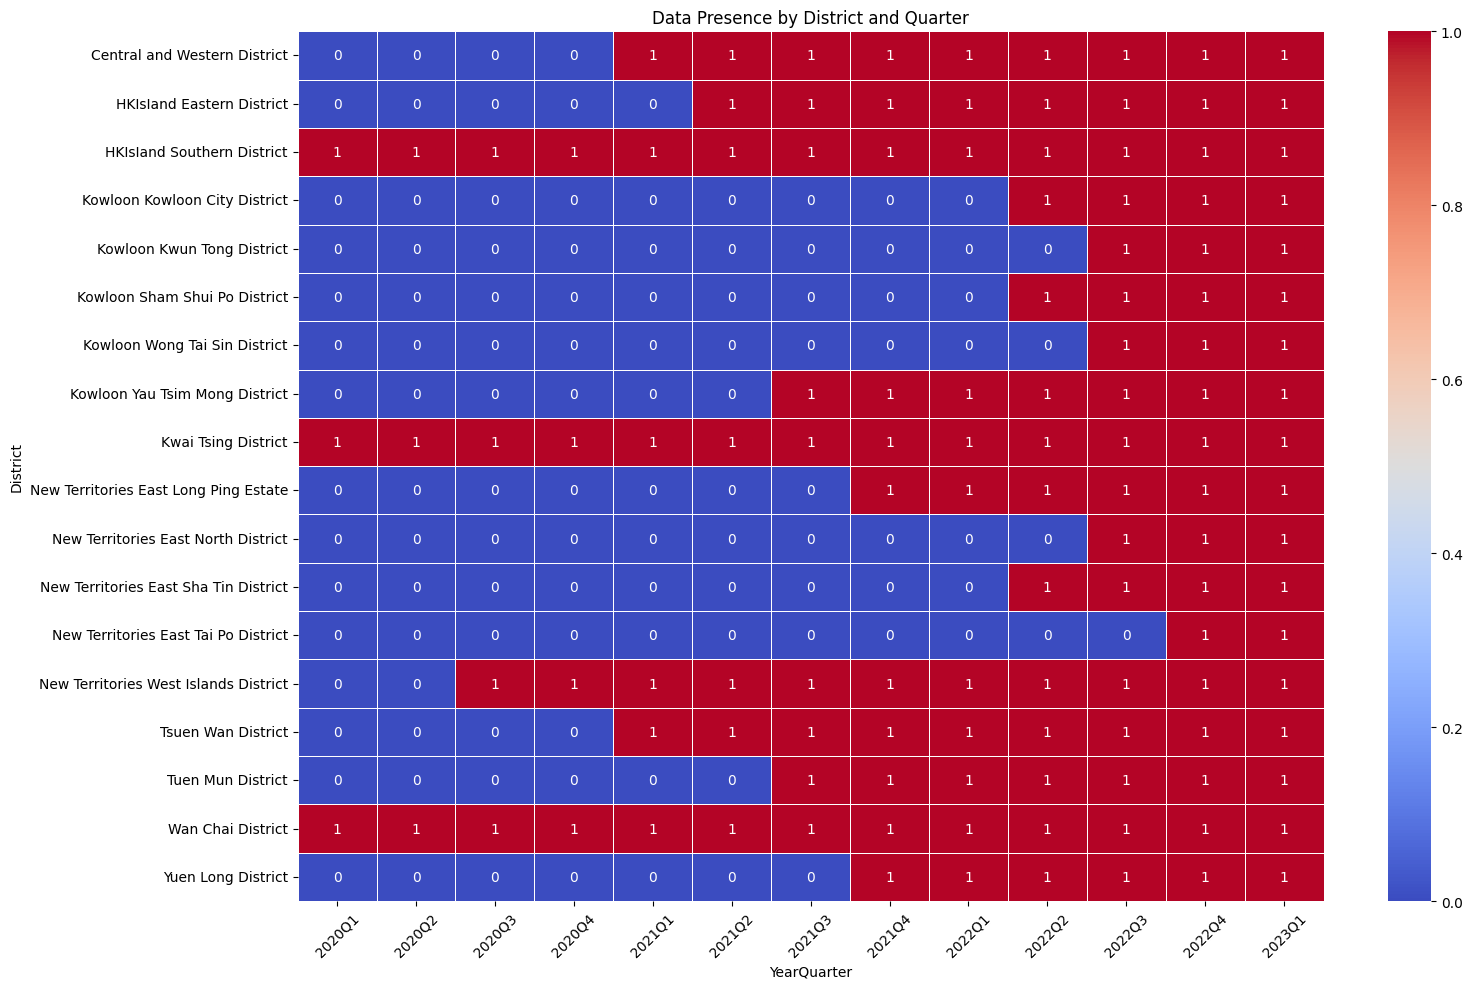

In [ ]:
# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(missing_data_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Data Presence by District and Quarter')
plt.xlabel('YearQuarter')
plt.ylabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DISTRIBUTION OF DATA

In [ ]:
# Display the first 20 rows of the merged_dataset
print(merged_dataset.head(20))

        date     price  saleable_area(ft^2)  unit_rate  \
7   08-03-23   6680000                  423      15792   
13  08-03-23  76000000                 2190      34703   
14  08-03-23  12070000                  761      15857   
15  08-03-23   4400000                  320      13717   
16  08-03-23   8600000                  519      16541   
17  08-03-23  10300000                  699      14721   
18  08-03-23   7380000                  463      15907   
19  08-03-23  11150000                  593      18799   
20  08-03-23   7580000                  501      15111   
21  08-03-23   6000000                  439      13662   
22  08-03-23   4110000                  289      14194   
23  08-03-23  15980000                  617      25863   
24  08-03-23   6500000                  689       9420   
25  08-03-23  22800000                 1101      20705   
26  08-03-23  21680000                 1100      19707   
27  08-03-23   7300000                  367      19888   
28  08-03-23  

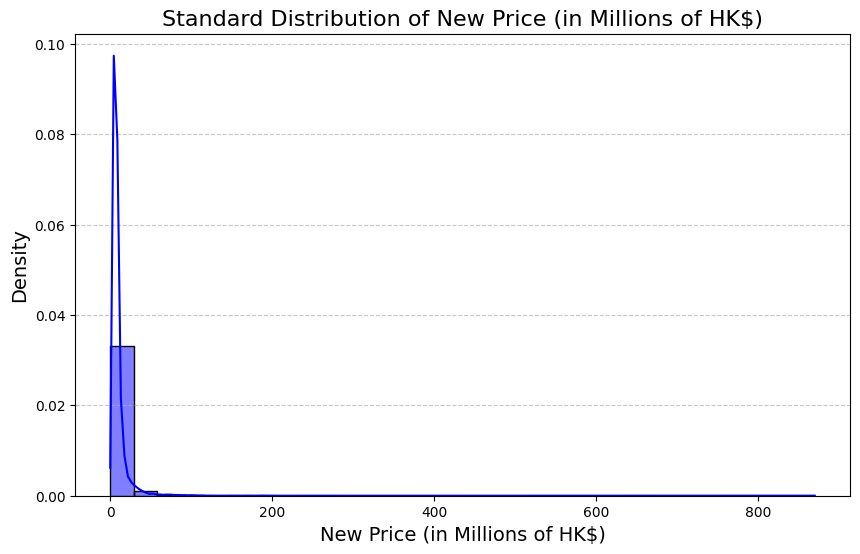

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded as a Pandas DataFrame
# Example: merged_dataset = pd.read_csv('path_to_your_dataset.csv')

# Check if the column 'new_price' exists
if 'new_price' not in merged_dataset.columns:
    raise ValueError("The column 'new_price' does not exist in the merged_dataset.")

# Scale the new_price column to millions of HK$
merged_dataset['new_price_millions'] = merged_dataset['new_price'] / 1_000_000

# Plot the standard distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_dataset['new_price_millions'], kde=True, bins=30, color='blue', stat="density")
plt.title('Standard Distribution of New Price (in Millions of HK$)', fontsize=16)
plt.xlabel('New Price (in Millions of HK$)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Statistics for new_price (filtered):
Mean: 8413992.59
Median: 6738096.50
Standard Deviation: 5629260.46


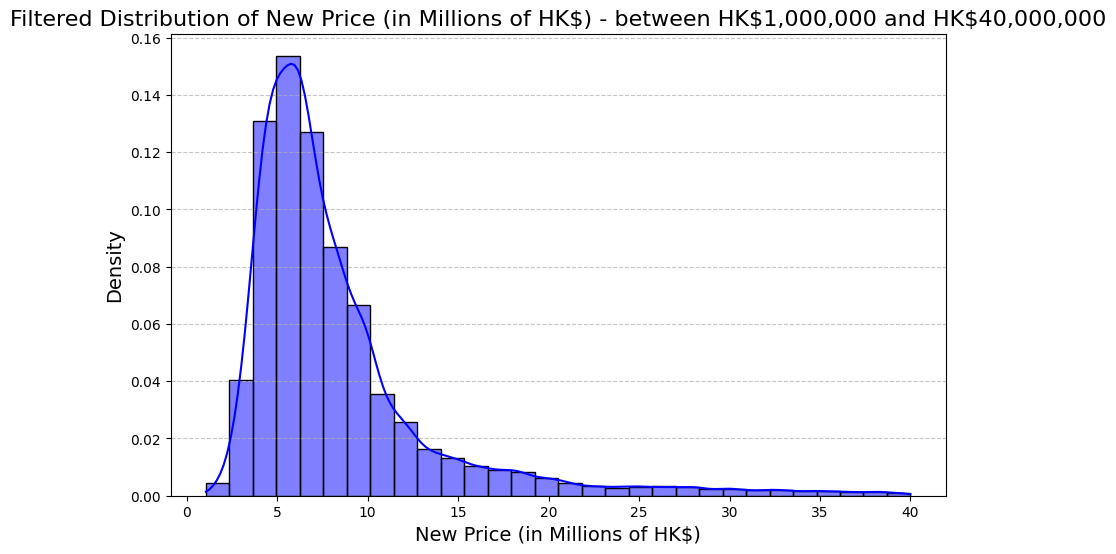

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded as a Pandas DataFrame
# Example: merged_dataset = pd.read_csv('path_to_your_dataset.csv')

# Check if the column 'new_price' exists
if 'new_price' not in merged_dataset.columns:
    raise ValueError("The column 'new_price' does not exist in the merged_dataset.")

# Filter new_price to remove values above 40,000,000 and below 1,000,000
filtered_dataset = merged_dataset[(merged_dataset['new_price'] <= 40_000_000) &
                                   (merged_dataset['new_price'] >= 1_000_000)]

# Save the filtered dataset for future machine learning
filtered_dataset.to_csv('filtered_dataset.csv', index=False)

# Calculate statistics
mean_price = filtered_dataset['new_price'].mean()
median_price = filtered_dataset['new_price'].median()
std_dev_price = filtered_dataset['new_price'].std()

print(f"Statistics for new_price (filtered):")
print(f"Mean: {mean_price:.2f}")
print(f"Median: {median_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")

# Convert new_price to millions for plotting
filtered_dataset['new_price_millions'] = filtered_dataset['new_price'] / 1_000_000

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataset['new_price_millions'], kde=True, bins=30, color='blue', stat="density")
plt.title('Filtered Distribution of New Price (in Millions of HK$) - between HK$1,000,000 and HK$40,000,000', fontsize=16)
plt.xlabel('New Price (in Millions of HK$)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

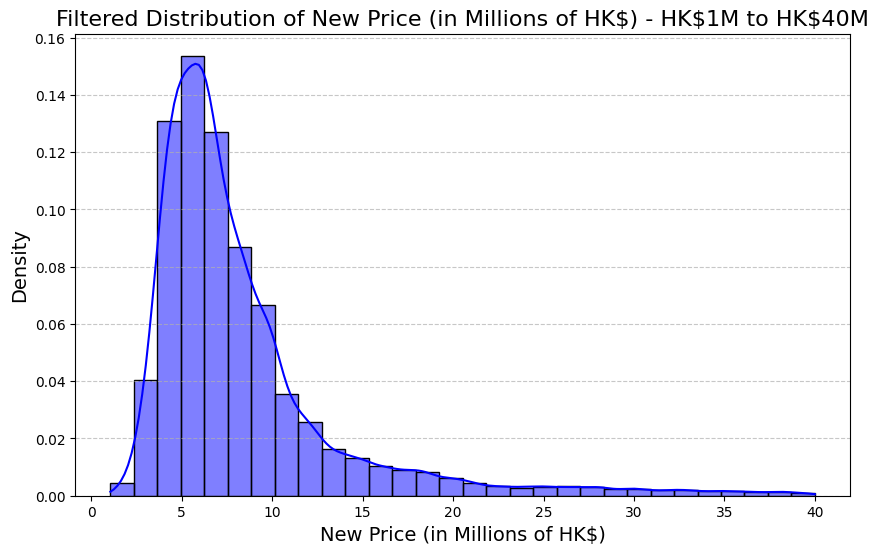

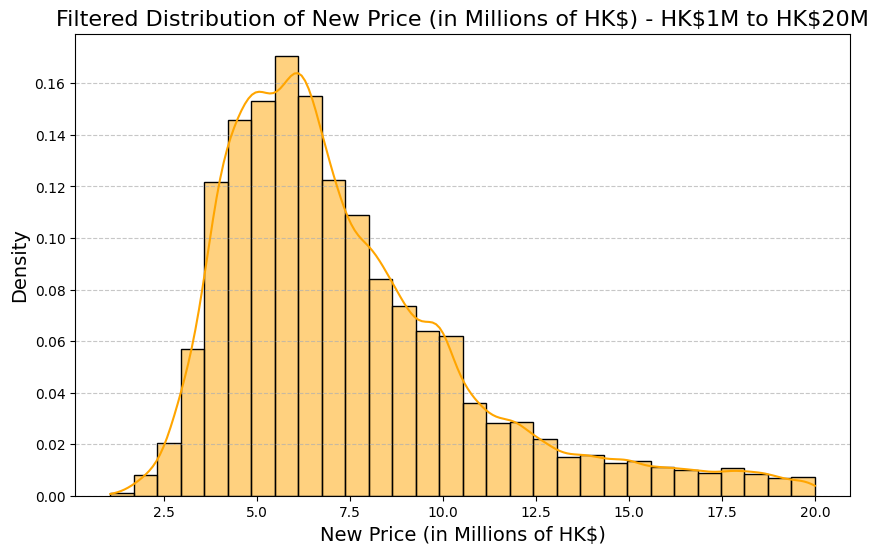

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded as a Pandas DataFrame
# Example: merged_dataset = pd.read_csv('path_to_your_dataset.csv')

# Check if the column 'new_price' exists
if 'new_price' not in merged_dataset.columns:
    raise ValueError("The column 'new_price' does not exist in the merged_dataset.")

# Filter dataset for new_price between 1,000,000 and 40,000,000
filtered_dataset140 = merged_dataset[(merged_dataset['new_price'] <= 40_000_000) &
                                      (merged_dataset['new_price'] >= 1_000_000)]

# Filter dataset for new_price between 1,000,000 and 20,000,000
filtered_dataset120 = merged_dataset[(merged_dataset['new_price'] <= 20_000_000) &
                                      (merged_dataset['new_price'] >= 1_000_000)]

# Save both datasets to CSV for future use
filtered_dataset140.to_csv('filtered_dataset140.csv', index=False)
filtered_dataset120.to_csv('filtered_dataset120.csv', index=False)

# Convert new_price to millions for plotting in both datasets
filtered_dataset140['new_price_millions'] = filtered_dataset140['new_price'] / 1_000_000
filtered_dataset120['new_price_millions'] = filtered_dataset120['new_price'] / 1_000_000

# Plot the distribution for filtered_dataset140
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataset140['new_price_millions'], kde=True, bins=30, color='blue', stat="density")
plt.title('Filtered Distribution of New Price (in Millions of HK$) - HK$1M to HK$40M', fontsize=16)
plt.xlabel('New Price (in Millions of HK$)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the distribution for filtered_dataset120
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataset120['new_price_millions'], kde=True, bins=30, color='orange', stat="density")
plt.title('Filtered Distribution of New Price (in Millions of HK$) - HK$1M to HK$20M', fontsize=16)
plt.xlabel('New Price (in Millions of HK$)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
merged_dataset.shape

(109888, 28)

In [ ]:
filtered_dataset120.shape

(102258, 28)

In [ ]:
filtered_dataset140.shape


(107536, 28)

# GETTING READY FOR ML ON THE FILTERED DATASETS


# Define the targets and the features

# Drop columns not useful for the LSDM model from both 'filtered_dataset'

In [ ]:
import pandas as pd

# Define the columns to drop
columns_to_drop = [
    'floor', 'price_range', 'property_size', 'region', 'YearQuarter',
    'pi_range', 'YearQuarter_encoded', 'property_size_encoded', 'date',
    'district', 'timestamp', 'unix_timestamp', 'district_encoded',
    'YearQuarter_encoded', 'property_size_encoded', 'region_encoded','new_price_millions'
]

# Drop columns from filtered_dataset120
filtered_dataset120 = filtered_dataset120.drop(
    columns=[col for col in columns_to_drop if col in filtered_dataset120.columns],
    inplace=False
)

# Drop columns from filtered_dataset140
filtered_dataset140 = filtered_dataset140.drop(
    columns=[col for col in columns_to_drop if col in filtered_dataset140.columns],
    inplace=False
)

# Print the shapes of the resulting datasets
print(f"Shape of filtered_dataset120 after dropping columns: {filtered_dataset120.shape}")
print(f"Shape of filtered_dataset140 after dropping columns: {filtered_dataset140.shape}")

# Optionally, display the first few rows of each dataset
print("First few rows of filtered_dataset120:")
print(filtered_dataset120.head())

print("\nFirst few rows of filtered_dataset140:")
print(filtered_dataset140.head())

Shape of filtered_dataset120 after dropping columns: (102258, 19)
Shape of filtered_dataset140 after dropping columns: (107536, 19)
First few rows of filtered_dataset120:
    saleable_area(ft^2)  unit_rate  scaled_unix_timestamp   CG    CI  CPI  \
7                   423      15792               0.997263  9.1  66.1  2.0   
14                  761      15857               0.997263  9.1  66.1  2.0   
15                  320      13717               0.997263  9.1  66.1  2.0   
16                  519      16541               0.997263  9.1  66.1  2.0   
17                  699      14721               0.997263  9.1  66.1  2.0   

     GDP      HS    IR  LTV    M3    MW   PG     PI    SD     SM     SOLD  \
7   91.4  5250.0  4.75  0.5  16.5  17.7  8.0 -10.24  0.08  20.58  14509.0   
14  91.4  5250.0  4.75  0.5  16.5  17.7  8.0 -10.24  0.08  20.58  14509.0   
15  91.4  5250.0  4.75  0.5  16.5  17.7  8.0 -10.24  0.08  20.58  14509.0   
16  91.4  5250.0  4.75  0.5  16.5  17.7  8.0 -10.24  0.08 

In [ ]:
filtered_dataset120.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102258 entries, 7 to 159675
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   saleable_area(ft^2)    102258 non-null  int64  
 1   unit_rate              102258 non-null  int64  
 2   scaled_unix_timestamp  102258 non-null  float64
 3   CG                     102258 non-null  float64
 4   CI                     102258 non-null  float64
 5   CPI                    102258 non-null  float64
 6   GDP                    102258 non-null  float64
 7   HS                     102258 non-null  float64
 8   IR                     102258 non-null  float64
 9   LTV                    102258 non-null  float64
 10  M3                     102258 non-null  float64
 11  MW                     102258 non-null  float64
 12  PG                     102258 non-null  float64
 13  PI                     102258 non-null  float64
 14  SD                     102258 non-null  f

# CHECK VARIABLE CORRELATION

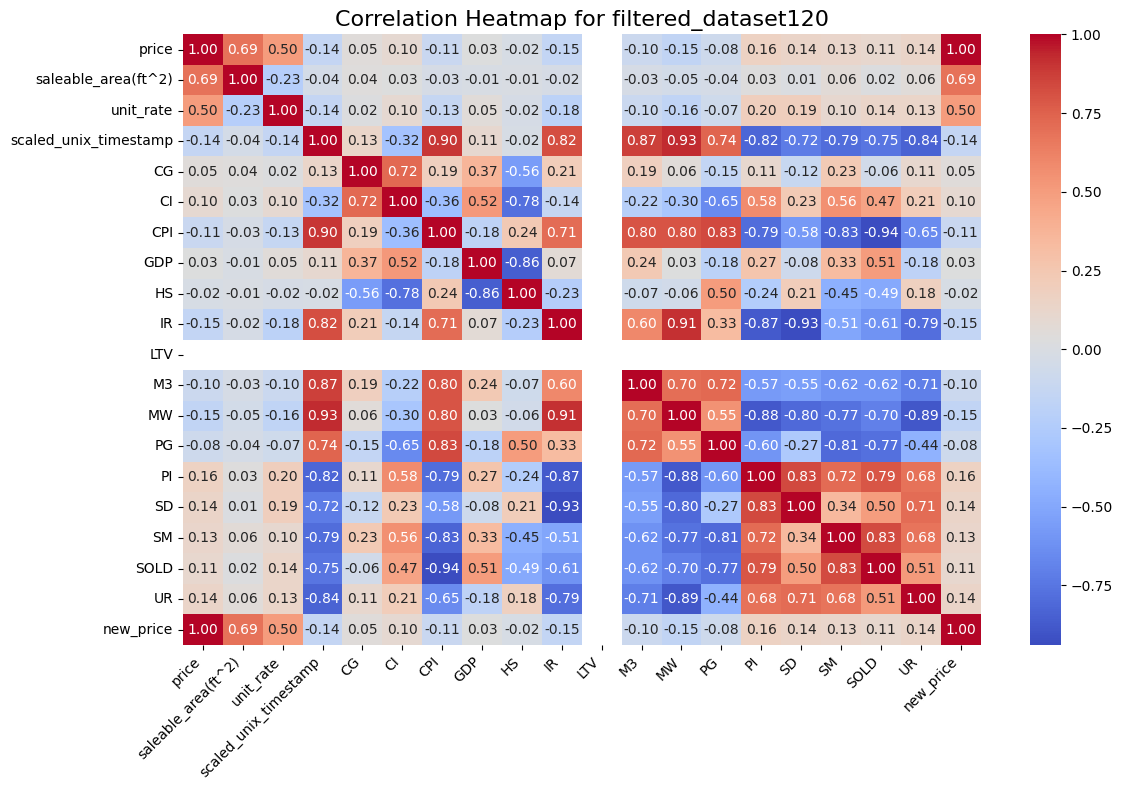

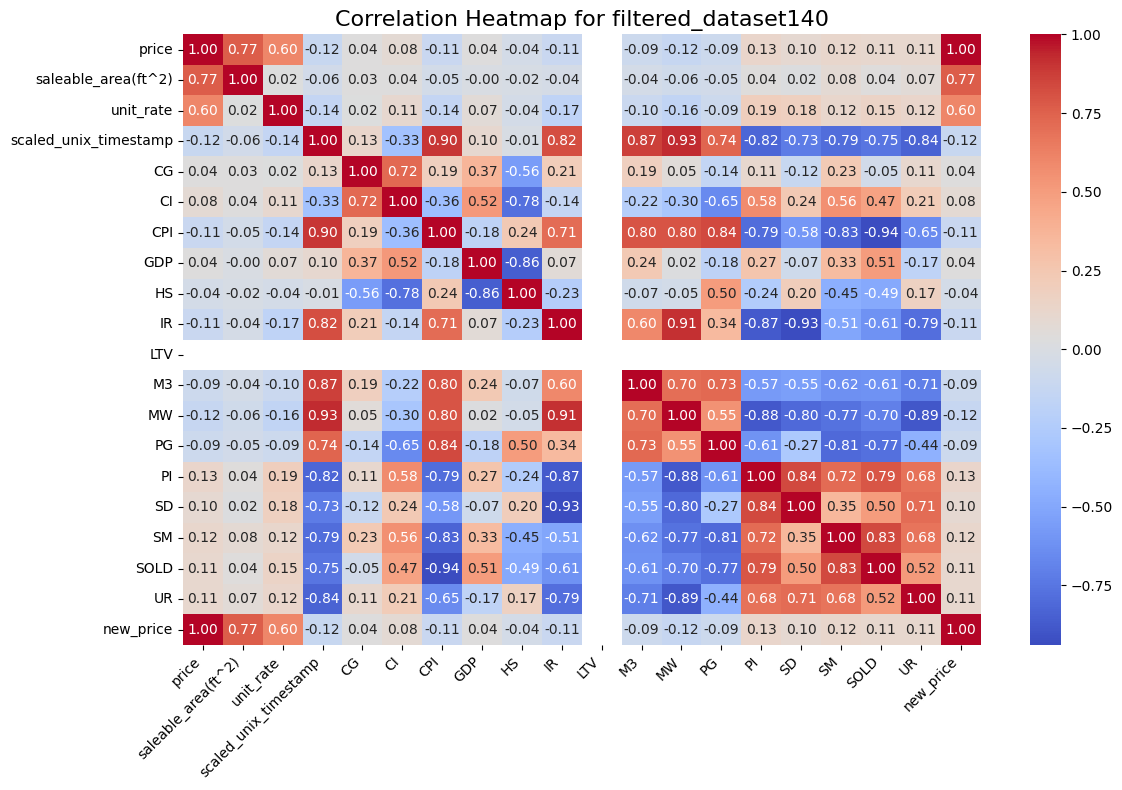

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for filtered_dataset120
correlation_matrix_120 = filtered_dataset120.corr()

# Plot heatmap for filtered_dataset120
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_120, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for filtered_dataset120", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Compute correlation matrix for filtered_dataset140
correlation_matrix_140 = filtered_dataset140.corr()

# Plot heatmap for filtered_dataset140
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_140, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for filtered_dataset140", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# DEFINE THE FEATURES AND VARIABLES
### Defining the feature matrix (X) and target variables (y) from the filtered_dataset(s).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Separate features and target for filtered_dataset120
features_120 = filtered_dataset120.drop(columns=['new_price', 'PI'], axis=1)  # Features
target_120 = filtered_dataset120[['new_price', 'PI']]  # Target variables

# Separate features and target for filtered_dataset140
features_140 = filtered_dataset140.drop(columns=['new_price', 'PI'], axis=1)  # Features
target_140 = filtered_dataset140[['new_price', 'PI']]  # Target variables

# Initialize MinMaxScaler for features and target
scaler_features_120 = MinMaxScaler()
scaler_target_120 = MinMaxScaler()
scaler_features_140 = MinMaxScaler()
scaler_target_140 = MinMaxScaler()

# Scale the features and targets for filtered_dataset120
scaled_features_120 = scaler_features_120.fit_transform(features_120)
scaled_target_120 = scaler_target_120.fit_transform(target_120)  # No need for reshape(-1, 1) since it has multiple columns

# Scale the features and targets for filtered_dataset140
scaled_features_140 = scaler_features_140.fit_transform(features_140)
scaled_target_140 = scaler_target_140.fit_transform(target_140)  # No need for reshape(-1, 1) since it has multiple columns

# Reshape scaled features for LSTM (samples, timesteps, features)
# Each row is treated as a separate sequence with one timestep
lstm_features_120 = scaled_features_120.reshape((scaled_features_120.shape[0], 1, scaled_features_120.shape[1]))
lstm_features_140 = scaled_features_140.reshape((scaled_features_140.shape[0], 1, scaled_features_140.shape[1]))

# Convert target variables to numpy arrays for consistency
lstm_target_120 = scaled_target_120
lstm_target_140 = scaled_target_140

# Save the prepared data for future use
np.save('lstm_features_120.npy', lstm_features_120)
np.save('lstm_target_120.npy', lstm_target_120)
np.save('lstm_features_140.npy', lstm_features_140)
np.save('lstm_target_140.npy', lstm_target_140)

# Print shapes to confirm
print(f"LSTM features for filtered_dataset120: {lstm_features_120.shape}")
print(f"LSTM target for filtered_dataset120: {lstm_target_120.shape}")
print(f"LSTM features for filtered_dataset140: {lstm_features_140.shape}")
print(f"LSTM target for filtered_dataset140: {lstm_target_140.shape}")

LSTM features for filtered_dataset120: (102258, 1, 17)
LSTM target for filtered_dataset120: (102258, 2)
LSTM features for filtered_dataset140: (107536, 1, 17)
LSTM target for filtered_dataset140: (107536, 2)


In [ ]:
# Define features and targets
features_120 = filtered_dataset120.drop(columns=['new_price', 'PI'], axis=1)  # Features
targets_120 = filtered_dataset120[['new_price', 'PI']]  # Targets

# LSTM MODEL 120 (incl adding features to prevent OVERFITTING)
 Bascally adding drop out layers, adjusting the learning rate, batch normalisation and early stopping



Training LSTM model for new_price...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 8200 samples...
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 16380 samples...
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Training model with 24560 samples...
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 32740 samples...
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 40920 samples...
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training model with 49100 samples...
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training model with 57280 samples...
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Trainin

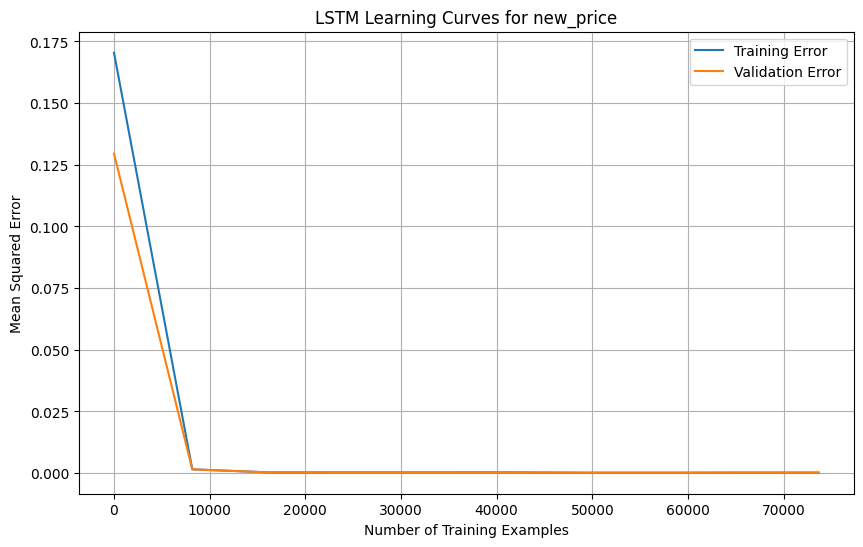

Finished training for new_price.


Training LSTM model for PI...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 8200 samples...
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training model with 16380 samples...
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 24560 samples...
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 32740 samples...
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 40920 samples...
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 49100 samples...
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 57280 samples...
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
640/640 ━━━━━━━━━━━━━

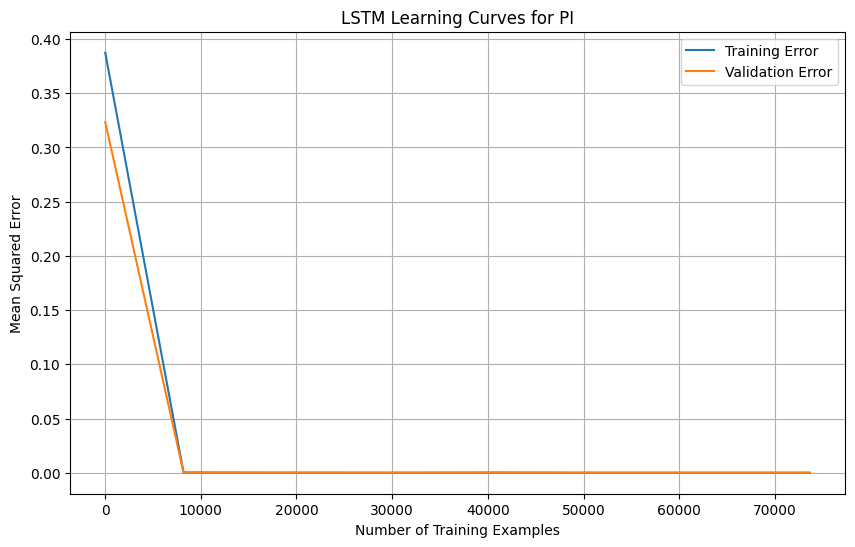

Finished training for PI.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'LSTM Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the dataset
filtered_dataset120 = filtered_dataset120.copy()  # Ensure we don't modify the original

# Define features and targets
features_120 = filtered_dataset120.drop(columns=['new_price', 'PI'], axis=1)  # Features
targets_120 = filtered_dataset120[['new_price', 'PI']]  # Targets

# Scale the features and targets using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

# Scale features
scaled_features_120 = scaler_features.fit_transform(features_120)

# Scale targets
scaled_targets_120 = scaler_targets.fit_transform(targets_120)

# Reshape features for LSTM (samples, timesteps, features)
X_scaled = scaled_features_120.reshape((scaled_features_120.shape[0], 1, scaled_features_120.shape[1]))

# Iterate over each target variable
for target_idx, target_name in enumerate(targets_120.columns):
    print(f'\nTraining LSTM model for {target_name}...\n')

    # Define the target variable (y)
    y = scaled_targets_120[:, target_idx]  # Select the column for the current target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create an LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model with different training sizes
    step_size = max(1, len(X_train) // 10)  # Define step size for training size increments
    for i in range(20, len(X_train), step_size):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        history = model.fit(X_train_sample, y_train_sample, epochs=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample)
        y_test_pred = model.predict(X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target_name)

    print(f"Finished training for {target_name}.\n")

# Optimised code to speed up the results
(by changing the training to 40 steps and not going beyond 10000 samples) as beyond 10000 sample there is no change in the accuarcy)


Training LSTM model for new_price...

Training model with 250 samples...
Training model with 500 samples...
Training model with 750 samples...
Training model with 1000 samples...
Training model with 1250 samples...
Training model with 1500 samples...
Training model with 1750 samples...
Training model with 2000 samples...
Training model with 2250 samples...
Training model with 2500 samples...
Training model with 2750 samples...
Training model with 3000 samples...
Training model with 3250 samples...
Training model with 3500 samples...
Training model with 3750 samples...
Training model with 4000 samples...
Training model with 4250 samples...
Training model with 4500 samples...
Training model with 4750 samples...
Training model with 5000 samples...
Training model with 5250 samples...
Training model with 5500 samples...
Training model with 5750 samples...
Training model with 6000 samples...
Training model with 6250 samples...
Training model with 6500 samples...
Training model with 6750 sam

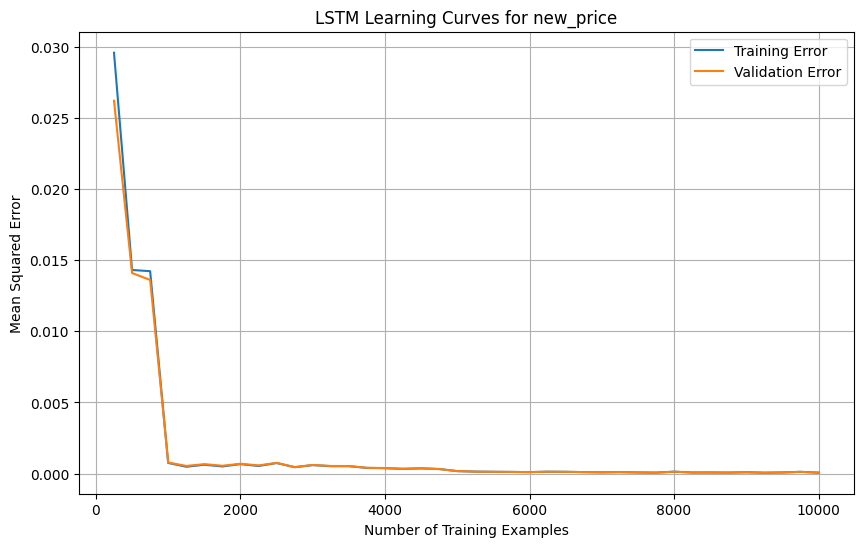

Finished training for new_price.


Training LSTM model for PI...

Training model with 250 samples...
Training model with 500 samples...
Training model with 750 samples...
Training model with 1000 samples...
Training model with 1250 samples...
Training model with 1500 samples...
Training model with 1750 samples...
Training model with 2000 samples...
Training model with 2250 samples...
Training model with 2500 samples...
Training model with 2750 samples...
Training model with 3000 samples...
Training model with 3250 samples...
Training model with 3500 samples...
Training model with 3750 samples...
Training model with 4000 samples...
Training model with 4250 samples...
Training model with 4500 samples...
Training model with 4750 samples...
Training model with 5000 samples...
Training model with 5250 samples...
Training model with 5500 samples...
Training model with 5750 samples...
Training model with 6000 samples...
Training model with 6250 samples...
Training model with 6500 samples...
T

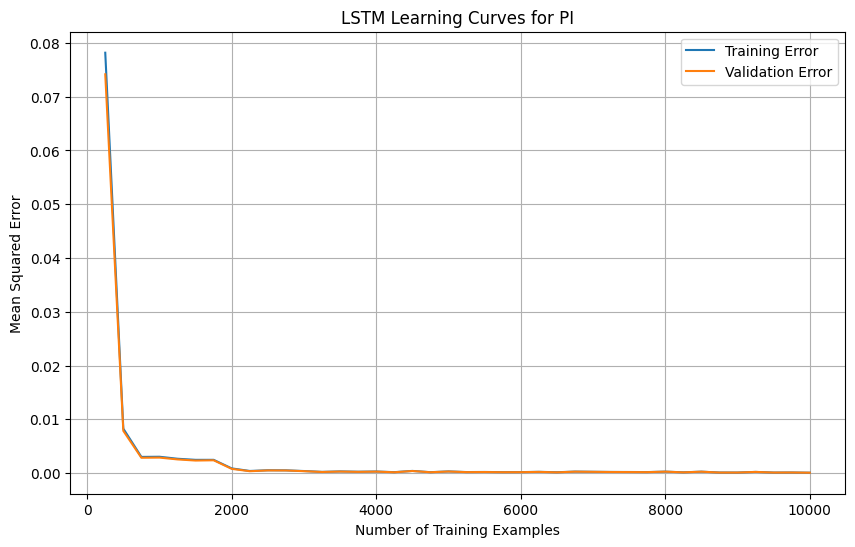

Finished training for PI.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'LSTM Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the dataset
filtered_dataset120 = filtered_dataset120.copy()  # Ensure we don't modify the original

# Define features and targets
features_120 = filtered_dataset120.drop(columns=['new_price', 'PI'], axis=1)  # Features
targets_120 = filtered_dataset120[['new_price', 'PI']]  # Targets

# Scale the features and targets using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

# Scale features
scaled_features_120 = scaler_features.fit_transform(features_120)

# Scale targets
scaled_targets_120 = scaler_targets.fit_transform(targets_120)

# Reshape features for LSTM (samples, timesteps, features)
X_scaled = scaled_features_120.reshape((scaled_features_120.shape[0], 1, scaled_features_120.shape[1]))

# Set parameters for training size and steps
MAX_TRAINING_SAMPLES = 10000  # Cap the maximum number of training samples
TRAINING_STEPS = 40  # Limit the number of steps to 40

# Iterate over each target variable
for target_idx, target_name in enumerate(targets_120.columns):
    print(f'\nTraining LSTM model for {target_name}...\n')

    # Define the target variable (y)
    y = scaled_targets_120[:, target_idx]  # Select the column for the current target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Cap the maximum number of training samples
    max_samples = min(len(X_train), MAX_TRAINING_SAMPLES)
    X_train = X_train[:max_samples]
    y_train = y_train[:max_samples]

    # Calculate step size to ensure 40 steps
    step_size = max(1, max_samples // TRAINING_STEPS)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create an LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model with different training sizes
    for i in range(step_size, max_samples + 1, step_size):
        # Ensure we don't exceed the maximum number of training samples
        if i > max_samples:
            break

        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        history = model.fit(X_train_sample, y_train_sample, epochs=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target_name)

    print(f"Finished training for {target_name}.\n")

# Using the LSTM using the "scaled timestamp"
(by espressly utilising the scaled timestamp such that it is not just another feature)


Training LSTM model for new_price...

Training model with 250 samples...
Training model with 500 samples...
Training model with 750 samples...
Training model with 1000 samples...
Training model with 1250 samples...
Training model with 1500 samples...
Training model with 1750 samples...
Training model with 2000 samples...
Training model with 2250 samples...
Training model with 2500 samples...
Training model with 2750 samples...
Training model with 3000 samples...
Training model with 3250 samples...
Training model with 3500 samples...
Training model with 3750 samples...
Training model with 4000 samples...
Training model with 4250 samples...
Training model with 4500 samples...
Training model with 4750 samples...
Training model with 5000 samples...
Training model with 5250 samples...
Training model with 5500 samples...
Training model with 5750 samples...
Training model with 6000 samples...
Training model with 6250 samples...
Training model with 6500 samples...
Training model with 6750 sam

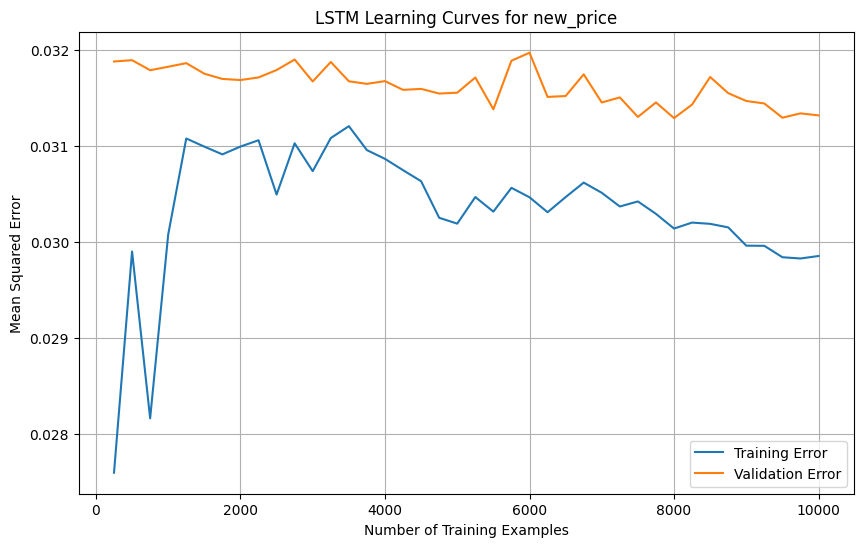

Finished training for new_price.


Training LSTM model for PI...

Training model with 250 samples...
Training model with 500 samples...
Training model with 750 samples...
Training model with 1000 samples...
Training model with 1250 samples...
Training model with 1500 samples...
Training model with 1750 samples...
Training model with 2000 samples...
Training model with 2250 samples...
Training model with 2500 samples...
Training model with 2750 samples...
Training model with 3000 samples...
Training model with 3250 samples...
Training model with 3500 samples...
Training model with 3750 samples...
Training model with 4000 samples...
Training model with 4250 samples...
Training model with 4500 samples...
Training model with 4750 samples...
Training model with 5000 samples...
Training model with 5250 samples...
Training model with 5500 samples...
Training model with 5750 samples...
Training model with 6000 samples...
Training model with 6250 samples...
Training model with 6500 samples...
T

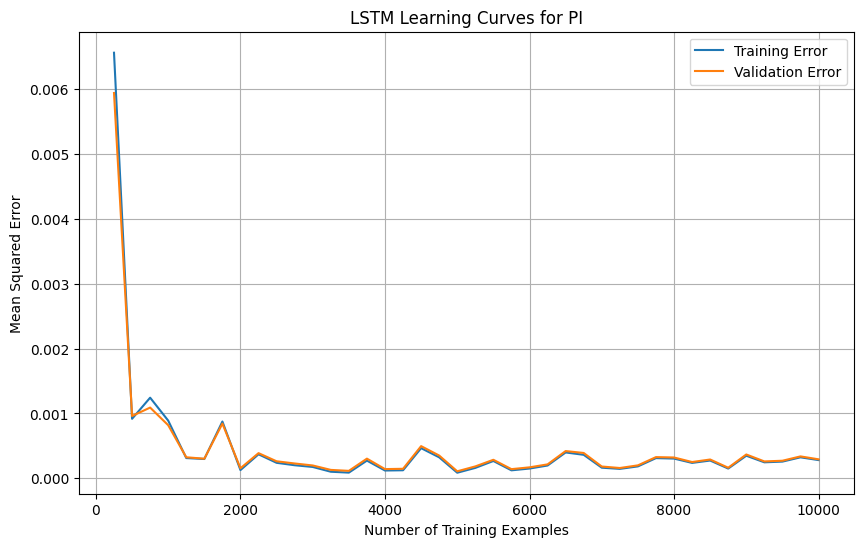

Finished training for PI.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'LSTM Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to create sequences for time-series data
def create_sequences(features, targets, timesteps):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:(i + timesteps)])  # Add sequence of timesteps
        y.append(targets[i + timesteps])      # Target corresponds to the next timestep
    return np.array(X), np.array(y)

# Load and preprocess the dataset
filtered_dataset120 = filtered_dataset120.copy()

# Ensure data is sorted by time
filtered_dataset120 = filtered_dataset120.sort_values(by='scaled_unix_timestamp')

# Define features and targets
features_120 = filtered_dataset120.drop(columns=['new_price', 'PI'], axis=1)  # Features
targets_120 = filtered_dataset120[['new_price', 'PI']]  # Targets

# Scale the features and targets
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

scaled_features_120 = scaler_features.fit_transform(features_120)
scaled_targets_120 = scaler_targets.fit_transform(targets_120)

# Create sequences with multiple time steps (e.g., 5 timesteps)
timesteps = 5  # Number of previous time steps to use
X, y = create_sequences(scaled_features_120, scaled_targets_120, timesteps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cap the maximum number of training samples
MAX_TRAINING_SAMPLES = 10000  # Cap the number of training samples
TRAINING_STEPS = 40  # Limit the number of steps to 40

# Iterate over each target variable
for target_idx, target_name in enumerate(targets_120.columns):
    print(f'\nTraining LSTM model for {target_name}...\n')

    # Define the target variable (y) for the current target column
    y_train_target = y_train[:, target_idx]
    y_test_target = y_test[:, target_idx]

    # Cap the maximum number of training samples
    max_samples = min(len(X_train), MAX_TRAINING_SAMPLES)
    X_train = X_train[:max_samples]
    y_train_target = y_train_target[:max_samples]

    # Calculate step size to ensure 40 steps
    step_size = max(1, max_samples // TRAINING_STEPS)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create an LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model with different training sizes
    for i in range(step_size, max_samples + 1, step_size):
        # Ensure we don't exceed the maximum number of training samples
        if i > max_samples:
            break

        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train_target[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        history = model.fit(X_train_sample, y_train_sample, epochs=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test_target, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target_name)

    print(f"Finished training for {target_name}.\n")

# HYPERPARAMETER TUNING of LSTM MODEL
Using KerasRegressor wrapper and compare the results with the base model

# CONFUSION MATRIX

(Check as used for a classiifcation problem)

# ENSEMBLING TECHNIQUES (1)


Training LSTM ensemble for new_price...

Subset Size: 8180 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 16361 | Training Error: 0.0001 | Test Error: 0.0001
Subset Size: 24541 | Training Error: 0.0001 | Test Error: 0.0001
Subset Size: 32722 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 40903 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 49083 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 57264 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 65444 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 73625 | Training Error: 0.0000 | Test Error: 0.0000
Subset Size: 81806 | Training Error: 0.0000 | Test Error: 0.0000


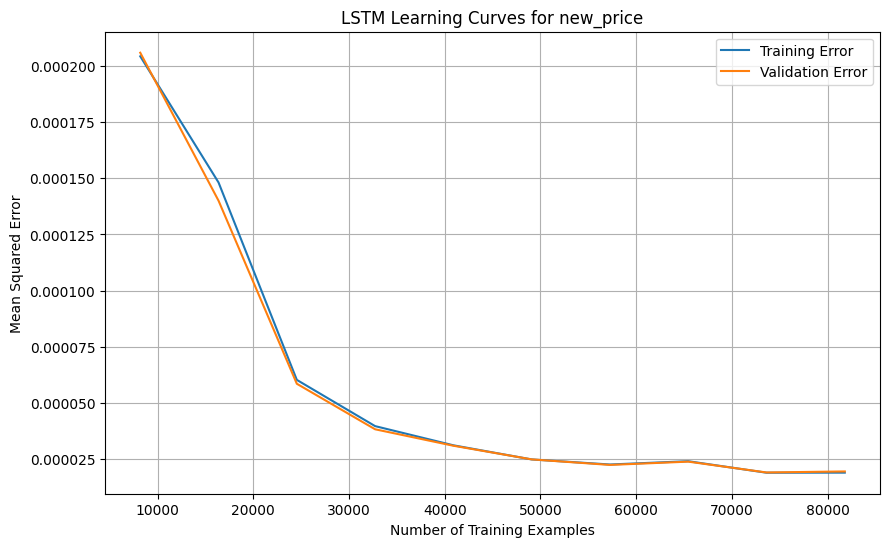

Finished training ensemble for new_price.


Training LSTM ensemble for PI...

Subset Size: 8180 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 16361 | Training Error: 0.0002 | Test Error: 0.0001
Subset Size: 24541 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 32722 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 40903 | Training Error: 0.0001 | Test Error: 0.0001
Subset Size: 49083 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 57264 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 65444 | Training Error: 0.0002 | Test Error: 0.0002
Subset Size: 73625 | Training Error: 0.0001 | Test Error: 0.0001
Subset Size: 81806 | Training Error: 0.0002 | Test Error: 0.0002


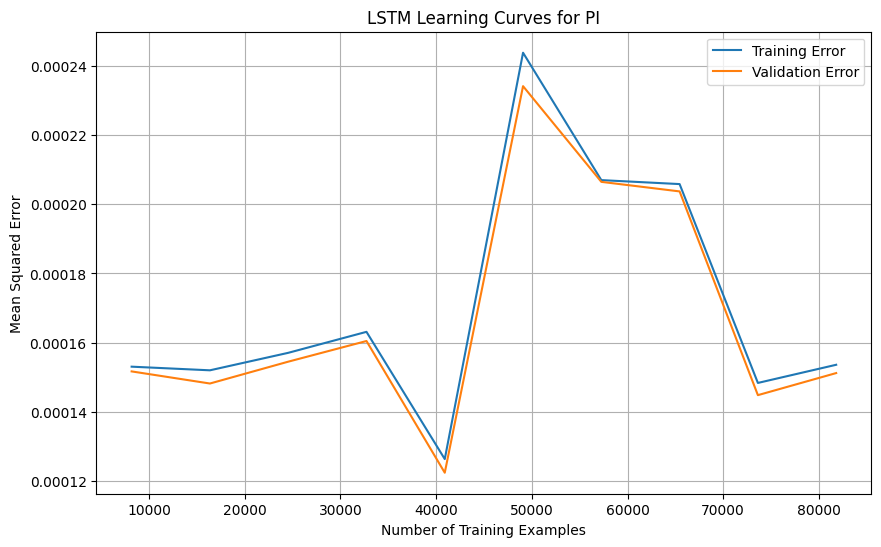

Finished training ensemble for PI.



In [ ]:
# Iterate over each target variable
NUM_MODELS = 5  # Number of models in the ensemble
for target_idx, target_name in enumerate(targets_120.columns):
    print(f'\nTraining LSTM ensemble for {target_name}...\n')

    # Define the target variable (y)
    y = scaled_targets_120[:, target_idx]  # Select the column for the current target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Train on progressively larger subsets of the training data
    for subset_size in np.linspace(0.1, 1.0, 10):  # 10 subsets, from 10% to 100% of the training data
        subset_size = int(len(X_train) * subset_size)
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Create an ensemble of models
        models = []
        for model_idx in range(NUM_MODELS):
            # Create and compile a new LSTM model
            model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

            # Early stopping to prevent overfitting
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            model.fit(X_train_subset, y_train_subset, epochs=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

            # Add the trained model to the ensemble
            models.append(model)

        # Ensemble prediction
        y_train_pred = ensemble_predict(models, X_train_subset)
        y_test_pred = ensemble_predict(models, X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_subset, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Append results
        train_sizes.append(len(X_train_subset))
        train_errors.append(train_error)
        test_errors.append(test_error)

        print(f"Subset Size: {len(X_train_subset)} | Training Error: {train_error:.4f} | Test Error: {test_error:.4f}")

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target_name)

    print(f"Finished training ensemble for {target_name}.\n")

# ENSEMBLING TECHNIQUES (2) BASED ON LSTM AND TIME SERIES
(using the "scaled_unix_timestamp" adding temporal featurs and keeing training less than 15,000)


Training LSTM ensemble for new_price...

Subset Size: 8180
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Subset Size: 8180 | Training Error: 0.000095 | Test Error: 0.000103
Subset Size: 16361
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Subset Size: 16361 | Training Err

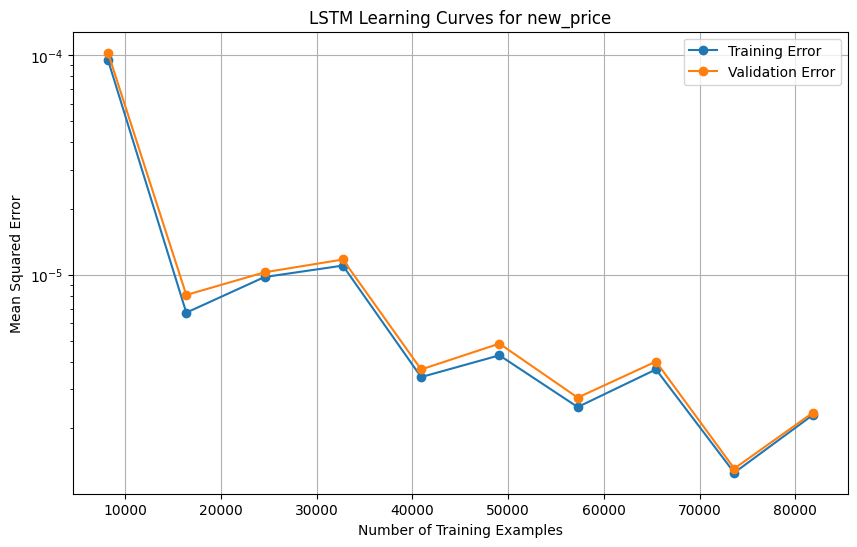

Finished training ensemble for new_price.


Training LSTM ensemble for PI...

Subset Size: 8180
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Subset Size: 8180 | Training Error: 0.000000 | Test Error: 0.000000
Subset Size: 16361
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

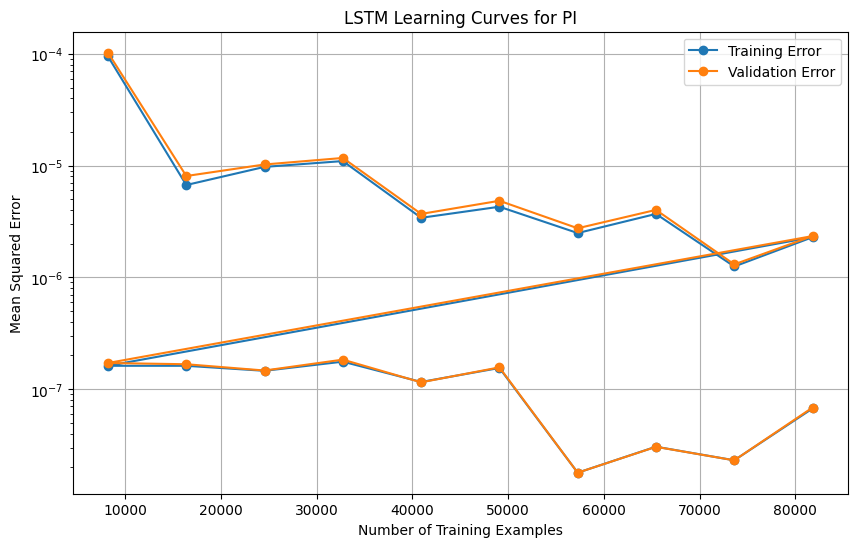

Finished training ensemble for PI.



In [37]:
NUM_MODELS = 5  # Number of models in the ensemble

train_sizes = []
train_errors = []
test_errors = []

for target_idx, target_name in enumerate(targets_120.columns):
    print(f'\nTraining LSTM ensemble for {target_name}...\n')

    # Define the target variable
    y = scaled_targets_120[:, target_idx]

    # Add temporal features
    X_with_temporal_features = add_temporal_features(X_scaled)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_with_temporal_features, y, test_size=0.2, random_state=42
    )

    # Train on progressively larger subsets
    for subset_fraction in np.linspace(0.1, 1.0, 10):  # Create 10 subsets, from 10% to 100% of training data
        subset_size = int(len(X_train) * subset_fraction)

        if subset_size < 10:  # Skip if subset size is too small
            continue

        print(f"Subset Size: {subset_size}")
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Create an ensemble of models
        models = []
        for model_idx in range(NUM_MODELS):
            model = create_lstm_model(input_shape=(X_train_subset.shape[1], X_train_subset.shape[2]))
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            model.fit(
                X_train_subset, y_train_subset,
                epochs=50, verbose=0, validation_split=0.2,
                callbacks=[early_stopping]
            )
            models.append(model)

        # Ensemble prediction
        y_train_pred = ensemble_predict(models, X_train_subset)
        y_test_pred = ensemble_predict(models, X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_subset, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Append results
        train_sizes.append(len(X_train_subset))
        train_errors.append(train_error)
        test_errors.append(test_error)

        print(f"Subset Size: {len(X_train_subset)} | Training Error: {train_error:.6f} | Test Error: {test_error:.6f}")

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target_name)
    print(f"Finished training ensemble for {target_name}.\n")